In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import json
import numpy as np
import os

In [13]:
scmap_str = json.loads(open("./DataPrep/scmap.json", "r").read())
scmap = {int(k): v for k, v in scmap_str.items()}
scmap[0xffff] = "NOSC"
scmap_r = {v: k for k, v in scmap.items()}

In [14]:
keys = [
    "id",
    "ip",
    "ls",
    "ping",
    "ssh",
    "ssh-keygen",
    "cat",
    "curl",
    #"find",
]
blurs = [0, 4, 12]
typs = ['pw', 'pr']
n_feats = {
    'pr': {
        0: 128,
        12: 128,
    },
    'pw': {
        0: 512,
        4: 512,
        12: 512,
    }
}
# curl_pr_128_12_Random_Forrest.83ae2e226a1ed92ed757976cc8cbcc5f.eval
eval_fns = []
for key in keys:
    for blur in blurs:
        for typ in n_feats.keys():
            try:
                eval_fns.append("%s_%s_%d_%d_Random_Forrest.83ae2e226a1ed92ed757976cc8cbcc5f.eval" % \
                                (key, typ, n_feats[typ][blur], blur))
            except:
                pass
        
chan_colors = {
    'pr': {
        0: 'dodgerblue',
        12: 'salmon',
    },
    'pw': {
        4: 'seagreen',
        0: 'dodgerblue',
        12: 'salmon',
    }
}

[[ 1.  0.  0. ...  0.  0.  0.]
 [ 0.  1.  0. ...  0.  0.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  1.  0.]
 [ 0.  0.  0. ... nan  0. nan]]
[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.84210526 ... 0.15789474 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.                nan        nan]]
[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.84210526 ... 0.15789474 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.    

[[1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.875 0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.      nan]
 [0.    0.    0.    0.    0.    0.    1.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0. 

[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.         

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.96153846 ... 0.03846154 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.                nan]]
[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.66666667 0.33333333 0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.                nan        nan ...        nan        nan        nan]]
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. 

[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.88888889 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.11111111 0.
  0.        ]
 [0.         0.         0.         0.95       0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.66666667 0.33333333 0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [       nan        nan 0.         ...        nan        nan        nan]]
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ... nan nan nan]]
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

[[ 1.  0.  0. ...  0.  0.  0.]
 [ 0.  1.  0. ...  0.  0.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ... nan nan nan]]
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0. nan nan ... nan nan nan]]
[[0.7254902  0.         0.         ... 0.         0.                nan]
 [0.         0.46258503 0.         ... 0.         0.                nan]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.                nan]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.                nan]]
[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.08390023 0.         ... 0.         0.                nan]
 [0.         0.         0.

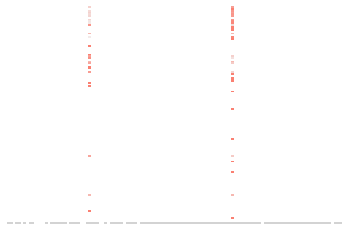

In [15]:

#sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style(style='white')
sns.set_style('whitegrid')
for ei, eval_fn in enumerate(eval_fns):
    parts = eval_fn.split("_")
    typ = parts[1]
    blur = int(parts[3])
    ev = pickle.load(open(os.path.join("./eval_out", eval_fn), "rb"))
    sc2key = ev["sc2key"]
    key2sc = ev["key2sc"]
    cf_matrix = ev["cf_matrix"]
    mkey = ev["mkey"]
    key = ev["key"]
    y_pred = ev["y_pred"]
    y_base = ev["y_base"]
    fig= plt.figure(1)
    ax = fig.add_subplot(111)
    cmap = sns.light_palette(chan_colors[typ][blur], as_cmap=True)
    #cmap.set_bad('white')
    
    cmap.set_bad('lightgray')
    cmap.set_under('white')
    ax.set_facecolor('white')
    #cf_matrix[cf_matrix<0.0001] = np.nan
    
    cf_matrix[-1][cf_matrix[-1]>0.000000001] = np.nan
    cf_matrix[:,-1][cf_matrix[:,-1]>0.000000001] = np.nan
    print(cf_matrix)
    sns.heatmap(cf_matrix, annot=False, cmap=cmap, cbar=False, xticklabels=False, yticklabels=False, vmin=0.000000001)
    sns.set_style(style='white')
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.savefig(os.path.join("./seq_cm", 'cm_%s_%s_%d.eps' % (key, typ, blur)), format='eps', bbox_inches = 'tight',pad_inches = 0)
    #plt.show()
    

In [5]:
nc_base = {}
nc_pred = {}
all_sc_key = {}
for key in keys:
    if key not in nc_pred.keys():
        nc_pred[key] = {}
        nc_base[key] = {}
        all_sc_key[key] = set()
    for typ, blur_data in n_feats.items():
        if typ not in nc_pred[key].keys():
            nc_pred[key][typ] = {}
            nc_base[key][typ] = {}
        for blur in blur_data.keys():
            try:
                eval_fn = "%s_%s_%d_%d_Random_Forrest.83ae2e226a1ed92ed757976cc8cbcc5f.eval" % \
                                (key, typ, n_feats[typ][blur], blur)
            except:
                continue
            eval_data = pickle.load(open(os.path.join("./eval_out", eval_fn), "rb"))
            nc_pred[key][typ][blur] = eval_data['sc_count_pred']
            nc_base[key][typ][blur] = eval_data['sc_count_base']
            #print(eval_data['sc_count_base'].keys())
            all_sc_key[key] = all_sc_key[key].union(set(eval_data['sc_count_base'].keys()))
            #all_sc_key[key] = all_sc_key[key].union(eval_data['sc_count_pred'].keys())
for key in keys:
    for sc in all_sc_key[key]:
        for typ, blur_data in n_feats.items():
            for blur in blur_data.keys():
                if sc not in nc_pred[key][typ][blur].keys():
                    nc_pred[key][typ][blur][sc] = 0
                if sc not in nc_base[key][typ][blur].keys():
                    nc_base[key][typ][blur][sc] = 0

nsc_step = 24
for key, sc_data in all_sc_key.items():
    nsc = 0
    sclist = []
    for sc in sc_data:
        scname = scmap[sc]
        if scname == "NOSC":
            continue
        if nc_base[key]['pr'][0][sc] == 0:
            continue
        nsc = nsc + 1
        sclist.append(sc)
    for idx, i in enumerate(range(0, len(sclist), nsc_step)):
        with open(os.path.join("./seq_cm", "sc_%s_%d.csv" % (key, idx)), "w") as fd:
            fd.write("sc,cbase,cpfr,cpfw,cdma,cpfmr,cpfmw,\n")
            #print(key)
            #print(sc_data)
            for sc in sclist[i:i+nsc_step]:
                scname = scmap[sc]
                if scname == "NOSC":
                    continue
                if nc_base[key]['pr'][0][sc] == 0:
                    continue
                scname = scname.replace("sys_", "")
                scname = scname.replace("_", "\_")
                fd.write("%s,%d,%d,%d,%d,%d,%d,\n" % \
                         (scname, 
                          nc_base[key]['pr'][0][sc],  # base
                          nc_pred[key]['pr'][0][sc], 
                          nc_pred[key]['pw'][0][sc], 
                          nc_pred[key]['pw'][4][sc], 
                          nc_pred[key]['pr'][12][sc], 
                          nc_pred[key]['pw'][12][sc]
                         )
                        )

In [6]:
scores = {}
scores_sc = {}
score_scs = {}
#print("\multirow{2}{*}{Prog} & \multicolumn{5}{*}{Precision} & \multicolumn{5}{*}{Precision}\\")
for key in keys:
    if key not in scores.keys():
        scores[key] = {}
        scores_sc[key] = {}
        score_scs[key] = set()
    for typ, blur_data in n_feats.items():
        if typ not in scores[key].keys():
            scores[key][typ] = {}
            scores_sc[key][typ] = {}
        for blur in blur_data.keys():
            try:
                eval_fn = "%s_%s_%d_%d_Random_Forrest.83ae2e226a1ed92ed757976cc8cbcc5f.eval" % \
                                (key, typ, n_feats[typ][blur], blur)
            except:
                continue
            eval_data = pickle.load(open(os.path.join("./eval_out", eval_fn), "rb"))
            class_rep = eval_data['class_rep']
            #print(class_rep)
            scores[key][typ][blur] = {
                'precision': class_rep['micro avg']['precision'],
                'recall': class_rep['micro avg']['recall'],
                'f1-score': class_rep['micro avg']['f1-score'],
            }
            if blur not in scores_sc.keys():
                scores_sc[key][typ][blur] = {}
            for sc, cpdata in class_rep.items():
                if not sc.startswith("sys_"):
                    continue
                #print(cpdata)
                scores_sc[key][typ][blur][sc] = {
                    'precision': cpdata['precision'],
                    'recall': cpdata['recall'],
                    'f1-score': cpdata['f1-score'],
                }
                score_scs[key].add(sc)


In [7]:
for key, key_data in scores_sc.items():
    for typ, typ_data in key_data.items():
        for blur, blur_data in typ_data.items():
            print("%s_%s_%d" % (key, typ, blur))
            for sc, scd in blur_data.items():
                print("%16s & %4.2f & %4.2f & %4.2f" % (sc, scd['precision'], scd['recall'], scd['f1-score']))
    

id_pr_0
        sys_read & 1.00 & 1.00 & 1.00
       sys_write & 1.00 & 1.00 & 1.00
        sys_open & 1.00 & 1.00 & 1.00
       sys_close & 1.00 & 1.00 & 1.00
    sys_newfstat & 1.00 & 1.00 & 1.00
       sys_lseek & 1.00 & 1.00 & 1.00
        sys_mmap & 1.00 & 1.00 & 1.00
    sys_mprotect & 1.00 & 1.00 & 1.00
      sys_munmap & 1.00 & 1.00 & 1.00
         sys_brk & 1.00 & 1.00 & 1.00
sys_rt_sigaction & 1.00 & 1.00 & 1.00
sys_rt_sigprocmask & 1.00 & 1.00 & 1.00
       sys_ioctl & 1.00 & 1.00 & 1.00
      sys_access & 1.00 & 1.00 & 1.00
      sys_socket & 1.00 & 1.00 & 1.00
     sys_connect & 1.00 & 1.00 & 1.00
        sys_exit & 0.00 & 0.00 & 0.00
       sys_chdir & 0.00 & 0.00 & 0.00
       sys_umask & 0.00 & 0.00 & 0.00
   sys_getrlimit & 1.00 & 1.00 & 1.00
      sys_getuid & 0.00 & 0.00 & 0.00
      sys_getgid & 0.00 & 0.00 & 0.00
      sys_setuid & 0.00 & 0.00 & 0.00
     sys_geteuid & 0.50 & 1.00 & 0.67
     sys_getegid & 0.00 & 0.00 & 0.00
   sys_getgroups & 0.00 & 0.00 & 0.00
  

In [8]:
for key, key_data in scores.items():
    print("\t%s &" % (key))
    
    print("\t%4.2f & %4.2f & %4.2f & %4.2f & %4.2f &" % \
          (
        key_data['pr'][0]['precision'],
        key_data['pw'][0]['precision'],
        key_data['pw'][4]['precision'],
        key_data['pr'][12]['precision'],
        key_data['pw'][12]['precision'],
          ))
    
    print("\t%4.2f & %4.2f & %4.2f & %4.2f & %4.2f &" % \
          (
        key_data['pr'][0]['recall'],
        key_data['pw'][0]['recall'],
        key_data['pw'][4]['recall'],
        key_data['pr'][12]['recall'],
        key_data['pw'][12]['recall'],
          ))
    
    print("\t%4.2f & %4.2f & %4.2f & %4.2f & %4.2f \\\\" % \
          (
        key_data['pr'][0]['f1-score'],
        key_data['pw'][0]['f1-score'],
        key_data['pw'][4]['f1-score'],
        key_data['pr'][12]['f1-score'],
        key_data['pw'][12]['f1-score'],
          ))

	id &
	0.78 & 0.86 & 0.84 & 0.44 & 0.00 &
	0.98 & 0.96 & 0.96 & 1.00 & 0.00 &
	0.87 & 0.91 & 0.89 & 0.61 & 0.00 \\
	ip &
	0.82 & 0.87 & 0.88 & 0.45 & 0.00 &
	0.98 & 0.95 & 0.97 & 0.98 & 0.00 &
	0.89 & 0.91 & 0.92 & 0.61 & 0.00 \\
	ls &
	0.78 & 0.95 & 0.92 & 0.18 & 0.00 &
	0.90 & 1.00 & 0.99 & 0.88 & 0.00 &
	0.84 & 0.97 & 0.95 & 0.30 & 0.00 \\
	ping &
	0.76 & 0.81 & 0.83 & 0.44 & 0.00 &
	0.99 & 0.96 & 0.95 & 0.99 & 0.00 &
	0.86 & 0.88 & 0.88 & 0.61 & 0.00 \\
	ssh &
	0.85 & 0.87 & 0.82 & 0.21 & 0.00 &
	0.94 & 0.91 & 0.92 & 0.93 & 0.01 &
	0.89 & 0.89 & 0.87 & 0.34 & 0.00 \\
	ssh-keygen &
	0.92 & 0.96 & 0.87 & 0.38 & 0.00 &
	0.99 & 0.59 & 0.59 & 0.99 & 0.00 &
	0.95 & 0.73 & 0.70 & 0.54 & 0.00 \\
	cat &
	0.86 & 0.86 & 0.82 & 0.27 & 0.00 &
	1.00 & 0.97 & 0.97 & 1.00 & 0.00 &
	0.93 & 0.91 & 0.89 & 0.42 & 0.00 \\
	curl &
	0.87 & 0.94 & 0.90 & 0.18 & 0.00 &
	0.71 & 0.55 & 0.72 & 0.50 & 0.00 &
	0.78 & 0.70 & 0.80 & 0.27 & 0.00 \\
